<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [ ]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2021-10-11 17:44:44--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  6.63MB/s    in 5.2s    

2021-10-11 17:44:50 (6.63 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
#TODO = train_test_split(#TODO)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Then a validation set from the train set:

In [ ]:
#TODO = train_test_split(#TODO)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

Let's KFold over different values of `C`:

In [ ]:
C_values = np.arange(1,100,5)
accuracies = []
accuracies1 = []

for c in C_values:
  print(f'Training SVM with C={c}')
  #TODO
  #kf = KFold(n_splits=2)
  
  # Fit on sub-train set
  # TODO
  clf = SVC(C=c)
  clf.fit(X_train, y_train)

  # Evaluate on val set
  # TODO
  #pred = clf.predict(X_val)
  
  #acc = np.sum((pred - y_val)**2) / len(pred) #score -> x val / yval
  acc1 = clf.score(X_train, y_train)
  acc = clf.score(X_val, y_val)
  accuracies.append(acc)
  accuracies1.append(acc1)

  print(f'--> accuracy = {acc}')

Training SVM with C=1


KeyboardInterrupt: ignored

In [ ]:
#TODO plot the relation between `c` and the accuracy
plt.title("Accuracy in function of C")
plt.plot(np.arange(1,100,5), np.array(accuracies))
plt.plot(np.arange(1,100,5), np.array(accuracies1))

In [ ]:
#TODO Fit on the whole train set, evaluate on the test set 
c = np.argmax(accuracies)
clf = SVC(C=c,  kernel='rbf', degree=3, decision_function_shape="ovr")
clf.fit(X_train, y_train)

# Evaluate on val set
# TODO
#pred = clf.predict(X_test)      
#acc = np.sum((pred - y_test)**2) / len(pred)
acc = clf.score(X_test, y_test)
print(acc)

0.6811594202898551


Do the same with different kernel values, and different decision functions:

[0.717948717948718, 0.7235228539576366, 0.7435897435897436, 0.11817168338907469]


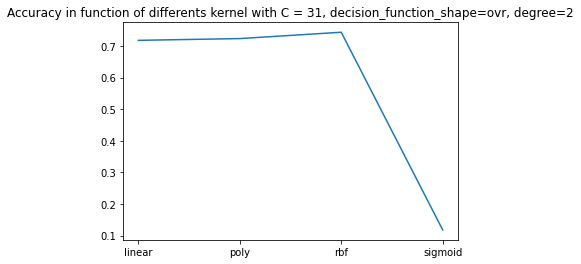

In [ ]:
# TODO
#TODO Fit on the whole train set, evaluate on the test set 
c = np.argmax(accuracies)
kernels = ["linear", "poly", "rbf", "sigmoid" ]
accs=[]
for kernel in kernels:
  clf = SVC(C=c,  kernel=kernel, degree=2, decision_function_shape="ovr")
  clf.fit(X_train, y_train)

  # Evaluate on val set
  # TODO
  #pred = clf.predict(X_test)      
  #acc = np.sum((pred - y_test)**2) / len(pred)
  acc = clf.score(X_test, y_test)
  accs.append(acc)
print(accs)

plt.title("Accuracy in function of differents kernel with C = 31, decision_function_shape=ovr, degree=2")
plt.xticks(np.arange(0,4,1),kernels)
plt.plot(accs)

[0.717948717948718, 0.717948717948718]


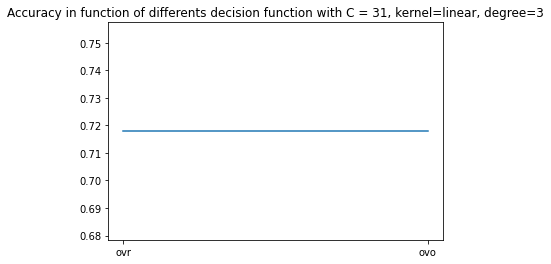

In [ ]:
# TODO
#TODO Fit on the whole train set, evaluate on the test set 
c = np.argmax(accuracies)
des = ["ovr", "ovo" ]
accs=[]
for desi in des:
  clf = SVC(C=c,  kernel="linear", degree=3, decision_function_shape=desi)
  clf.fit(X_train, y_train)

  # Evaluate on val set
  # TODO
  #pred = clf.predict(X_test)      
  #acc = np.sum((pred - y_test)**2) / len(pred)
  acc = clf.score(X_test, y_test)
  accs.append(acc)
print(accs)

plt.title("Accuracy in function of differents decision function with C = 31, kernel=linear, degree=3")
plt.xticks(np.arange(0,3,1),des)
plt.plot(accs)

[0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]


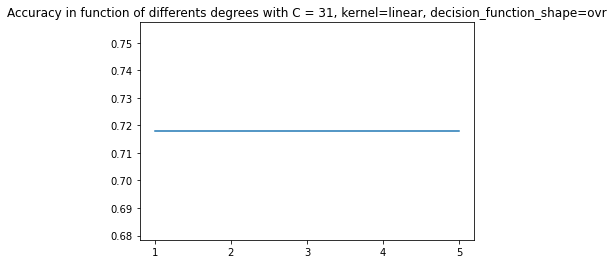

In [ ]:
# TODO
#TODO Fit on the whole train set, evaluate on the test set 
c = np.argmax(accuracies)
degrees = [1,2,3,4,5]
accs=[]
for deg in degrees:
  clf = SVC(C=c,  kernel="linear", degree=deg, decision_function_shape="ovr")
  clf.fit(X_train, y_train)

  # Evaluate on val set
  # TODO
  #pred = clf.predict(X_test)      
  #acc = np.sum((pred - y_test)**2) / len(pred)
  acc = clf.score(X_test, y_test)
  accs.append(acc)
print(accs)

plt.title("Accuracy in function of differents degrees with C = 31, kernel=linear, decision_function_shape=ovr")
plt.xticks(np.arange(0,6,1),degrees)
plt.plot(accs)

In [ ]:
# Avec grid search
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':np.arange(26,36,1), 'decision_function_shape':('ovr','ovo'), 'degree':(1,2,3)} # toooo longé
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
                         'decision_function_shape': ('ovr', 'ovo'),
                         'degree': (1, 2, 3),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.n_features_in_

AttributeError: ignored